# Unsupervised methods

Most of the methods we've looked at so far have applied *supervised* machine learning, where the learning methods require examples of text **input** (documents, words, etc.) and the **correct outputs** (classes, tags, etc.)

By contrast, *unsupervised* methods do not expect outputs, but instead aim to identify commonalities or structure in their input.

## Example: language models



Statistical language models estimate the "probability" of text, i.e. $P(w_1, w_2, \ldots, w_n)$

Basic N-gram approach:

* Assume (incorrectly) that $P(w_i)$ only depends on the N-1 previous words
    * e.g. for bigrams $P(w_i|w_{i-1},w_{i-2}, \ldots) = P(w_i|w_{i-1})$
* Count occurrences of N-grams in a large amount of (unlabelled) text
    * e.g. [Google Web 5-grams](https://catalog.ldc.upenn.edu/LDC2006T13): 1,024,908,267,229 words (~1 trillion)
* Estimate probabilities from counts and apply smoothing

---

A model that can estimate $P(w_i|w_{i-1},w_{i-2}, \ldots)$ can be used to generate text: given a "prompt" of words, pick the most likely next word, and repeat.

Recent example from [Open AI GPT-2](https://openai.com/blog/better-language-models/) neural language model:

<div style="margin:1em">
<table style="font-size:100%; text-align:left">
  <tr>
    <td><b>Prompt (human input)</b>:</td>
    <td><i>In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.</i></td>
  </tr>
  <tr>
    <td><b>System output</b>:</td>
    <td><p>The scientist named the population, after their distinctive horn, Ovid’s Unicorn. These four-horned, silver-white unicorns were previously unknown to science.</p>

<p>Now, after almost two centuries, the mystery of what sparked this odd phenomenon is finally solved.</p>

<p>Dr. Jorge Pérez, an evolutionary biologist from the University of La Paz, and several companions, were exploring the Andes Mountains when they found a small valley, with no other animals or humans. Pérez noticed that the valley had what appeared to be a natural fountain, surrounded by two peaks of rock and silver snow.</p>

<p>Pérez and the others then ventured further into the valley. “By the time we reached the top of one peak, the water looked blue, with some crystals on top,” said Pérez.</p>

<p>Pérez and his friends were astonished to see the unicorn herd. These creatures could be seen from the air without having to move too much to see them – they were so close they could touch their horns.</p>

<p>While examining these bizarre creatures the scientists discovered that the creatures also spoke some fairly regular English. Pérez stated, “We can see, for example, that they have a common ‘language,’ something like a dialect or dialectic.”</p>

<p>[...]</p>
</td>
</tr>
</table>
</div>

## Distributional semantics

Methods that aim to derive (representations of) meaning from text statistics. Based on a comparatively old idea (mandatory quotes):

<div style="text-align:center; font-size:120%; margin-top:1em"><i>If A and B have almost identical environments we say that they are synonyms</i> (Harris 1954)</div>

<div style="text-align:center; font-size:120%; margin-top:1em"><i>You shall know a word by the company it keeps</i> (Firth 1957)</div>

<div style="text-align:center; font-size:120%; margin-top:1em"><i>Words which are similar in meaning occur in similar contexts</i> (Rubenstein and Goodenough, 1965)</div>

---

Example:

<div style="margin:1em">
<table style="font-size:100%; text-align:left">
    <tr style="background-color:lightgray"><td>A large</td><td><b>___</b></td><td>runs in the yard</td></tr>
    <tr style="background-color:lightgreen"><td>A large</td><td><b>dog</b></td><td>runs in the yard</td></tr>
    <tr style="background-color:lightgreen"><td>A large</td><td><b>cat</b></td><td>runs in the yard</td></tr>
    <tr style="background-color:yellow"><td>A large</td><td><b>hat</b></td><td>runs in the yard</td></tr>
    <tr style="background-color:orangered"><td>A large</td><td><b>the</b></td><td>runs in the yard</td></tr>
</table>
</div>

Basic approach:

* Create a **word-context matrix** that records occurrences of words in context (for various definitions of context)
    * Most typically **word-word matrix**
* Process a large corpus of text, summing up (word, context) counts

<img src="figs/word_context_example.png" width="60%">

* Apply smoothing and/or statistics measuring association strength (e.g. PMI, TF-IDF)
* Perform dimensionality reduction

The process creates **word vectors** that aim to reflect word relationships: e.g. `similarity(cat,dog)` > `similarity(cat,hat)`

Hypothetical example with *very* small corpus:

In [1]:
words = ['a', 'cat', 'dog', 'eats', 'runs', 'the', 'yard']

word_word_matrix = [
    [  0, 43, 57,  0,  0,  0, 12 ],
    [  0,  0,  0, 13,  9,  0,  0 ],
    [  0,  0,  0,  9, 11,  0,  0 ],
    [ 21,  0,  0,  0,  0, 16,  0 ],
    [  5,  0,  0,  0,  0,  2,  0 ],
    [  0, 33, 38,  0,  0,  0,  7 ],
    [  0,  0,  0,  0,  0,  0,  0 ],    
]

In [2]:
from pandas import DataFrame


DataFrame(word_word_matrix, index=words, columns=words)

,a,cat,dog,eats,runs,the,yard
a,0,43,57,0,0,0,12
cat,0,0,0,13,9,0,0
dog,0,0,0,9,11,0,0
eats,21,0,0,0,0,16,0
runs,5,0,0,0,0,2,0
the,0,33,38,0,0,0,7
yard,0,0,0,0,0,0,0


Now, similar words should have similar vectors (rows):

In [3]:
import numpy as np


vec = dict((words[i], np.array(word_word_matrix[i])) for i in range(len(words)))

for w in ['dog', 'cat', 'eats', 'runs']:
    print(w, '\t', vec[w])

dog 	 [ 0  0  0  9 11  0  0]
cat 	 [ 0  0  0 13  9  0  0]
eats 	 [21  0  0  0  0 16  0]
runs 	 [5 0 0 0 0 2 0]


Vector similarity is typically measured using *cosine similarity*, the dot product of normalized (length 1) vectors:

$$cos(a,b) = \frac{a \cdot b}{\|a\|\|b\|} = \frac{\sum_i{a_i b_i}}{\sqrt{\sum_i{a_i^2}}\sqrt{\sum_i{b_i^2}}}$$

(i.e. for normalized vectors, this is just the sum of the elementwise products)

As the name suggests, this corresponds to the cosine of the angle between the vectors:

* if $a$ and $b$ pointing in the same direction, $cos(a,b) = 1$
* if $a$ and $b$ have a near 90 degree angle, $cos(a,b) = 0$
* if $a$ and $b$ point in opposite directions, $cos(a,b) = -1$


In [4]:
from math import sqrt


def cos(a, b):
    return np.dot(a,b)/(sqrt(np.dot(a,a))*sqrt(np.dot(b,b)))


for a, b in [['dog', 'cat'], ['dog', 'eats'], ['eats', 'runs']]:
    print('sim({:4s},{:4s}) = {:.2f}'.format(a, b, cos(vec[a], vec[b])))

sim(dog ,cat ) = 0.96
sim(dog ,eats) = 0.00
sim(eats,runs) = 0.96


It's not very surprising that an artificially constructed example can be made to work. Can we do this with real data?

---

# Recap

Yesterday, we talked about annotation and started looking into unsupervised methods, briefly covering

* Language models: estimate probability of text $P(w_1, w_2, \ldots, w_n)$
* Distributional semantics: representations of meaning from text statistics
* Word-word matrix and count-based word vectors
* Cosine similarity

# Neural word representations

Count-based word vectors are easy and effective, but recent *prediction-based* methods offer better performance at many tasks (see e.g. [Baroni et al. 2014](http://www.aclweb.org/anthology/P/P14/P14-1023.pdf)).

In prediction-based models, the task is to predict a word given its context (or vice versa):

<img src="figs/cbow_and_skipgram.png" width="60%">

<div style="text-align:center; font-size:80%">(figure adapted from <a href="https://arxiv.org/pdf/1301.3781.pdf">Mikolov et al. 2013</a>)</div>

The basic idea:

1. Create a random vector for each unique input word and context element (above, also words)
2. Map inputs and contexts to their vectors, try to predict one from the other (black box)
3. Update word and context vectors (and other model weights) to minimize errors (prediction differing from word/context example)
4. (Repeat 2-3)

**Note**: The word vectors are learned as a "side effect" of learning the prediction task.

---

In the following, we'll be working using the [gensim](https://radimrehurek.com/gensim/) library to work with vectors created using the [word2vec](https://github.com/tmikolov/word2vec) implementation of the skip-gram model.

The English word vectors were created by Mikolov et al. on 100 billion words of Google News texts. These are available [here](https://code.google.com/archive/p/word2vec/)

Let's load some vectors:

In [5]:
from gensim.models import KeyedVectors

# This is where the word vectors are found on the server
EN_WV_PATH = "/course_data/textmine/wordvecs/GoogleNews-vectors-negative300.bin"


en_wv = KeyedVectors.load_word2vec_format(EN_WV_PATH, binary=True, limit=100000)

Let's have a look at the data

In [6]:
print(en_wv['dog'].shape)

(300,)


These are 300-dimensional vectors. Can we make sense of one?

In [7]:
DataFrame([en_wv['dog']], index=['wv["dog"]'])

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
"wv[""dog""]",0.05127,-0.022339,-0.172852,0.161133,-0.084473,0.057373,0.058594,-0.08252,-0.015381,-0.063477,...,-0.180664,0.103027,-0.275391,0.261719,0.246094,-0.047119,0.0625,0.416016,-0.355469,0.222656


Doesn't look much like a dog. A couple of points:

* The vectors don't mean anything *in isolation*; they can only be interpreted with reference to other vectors (of the same collection)
    * `wv["dog"]` is a good representation of "dog" if its relations to other vectors (e.g. `wv["cat"]`) reflect the relations of the words (e.g. "cat")
* The specific values are (largely) arbitrary: re-running the method would not re-create these vectors
    * (It is not possible to look at this vector alone and determine that it represents "dog")
    
So, can we see the relations?

In [8]:
import seaborn as sns    # for colors


def heatmap(*args, **kwargs):    # this is just visualization
    cm = sns.diverging_palette(133, 10, l=80, as_cmap=True)
    df = DataFrame(*args, **kwargs)
    return df.style.background_gradient(cmap=cm)


words = ['dog', 'cat', 'hat', 'the']

heatmap([en_wv[w][:20] for w in words], index=['wv["{}"]'.format(w) for w in words])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
"wv[""dog""]",0.0512695,-0.0223389,-0.172852,0.161133,-0.0844727,0.057373,0.0585938,-0.0825195,-0.0153809,-0.0634766,0.179688,-0.423828,-0.022583,-0.166016,-0.0251465,0.107422,-0.199219,0.15918,-0.1875,-0.120117
"wv[""cat""]",0.0123291,0.204102,-0.285156,0.216797,0.118164,0.0830078,0.0498047,-0.00952148,0.220703,-0.125977,0.0805664,-0.585938,-0.00445557,-0.296875,-0.0131226,-0.0834961,0.0505371,0.151367,-0.449219,-0.0135498
"wv[""hat""]",-0.124512,-0.0201416,-0.204102,-0.125,-0.168945,-0.120117,0.0629883,-0.113281,0.24707,0.130859,0.0300293,-0.104004,0.00320435,-0.191406,-0.523438,0.21582,-0.214844,0.0463867,0.136719,-0.209961
"wv[""the""]",0.0800781,0.10498,0.0498047,0.0534668,-0.0673828,-0.120605,0.0351562,-0.118652,0.0439453,0.0301514,-0.0568848,-0.0761719,0.0128784,0.0498047,-0.0849609,-0.0634766,0.00628662,-0.0432129,0.0202637,0.0133057


... maybe the similarities make more sense?

In [9]:
for a, b in [['dog', 'cat'], ['dog', 'hat'], ['dog', 'the']]:
    print('sim({},{}) = {:.2f}'.format(a, b, cos(en_wv[a], en_wv[b])))

sim(dog,cat) = 0.76
sim(dog,hat) = 0.20
sim(dog,the) = 0.06


Nice! Can we do that in Finnish?

We'll use vectors created similarly on [http://bionlp.utu.fi/finnish-internet-parsebank.html](Finnish Internet Parsebank) texts.

In [10]:
# This is where the word vectors are found on the server
FI_WV_PATH = "/course_data/textmine/wordvecs/pb34_wf_200_v2.bin"


fi_wv = KeyedVectors.load_word2vec_format(FI_WV_PATH, binary=True, limit=100000)

for a, b in [['koira', 'kissa'], ['koira', 'hattu'], ['koira', 'yksi']]:
    print('sim({},{}) = {:.2f}'.format(a, b, cos(fi_wv[a], fi_wv[b])))

sim(koira,kissa) = 0.85
sim(koira,hattu) = 0.31
sim(koira,yksi) = 0.08


### Neighbours in vector space

Looking for vectors most similar to a given input can find synonyms and closely related words:

In [11]:
def show_similar(wv, word):    # visualization
    return DataFrame(wv.most_similar(word), columns=['word', 'similarity']).style.hide_index()


show_similar(en_wv, 'dog')

word,similarity
dogs,0.868049
puppy,0.810643
pit_bull,0.780396
pooch,0.762738
cat,0.760946
golden_retriever,0.75009
German_shepherd,0.746517
Rottweiler,0.743761
beagle,0.741862
pup,0.740691


In [12]:
show_similar(fi_wv, 'koira')

word,similarity
pentu,0.894558
koirakin,0.860871
kissa,0.845947
koiruus,0.839777
hevonen,0.836254
kani,0.830166
marsu,0.795733
eläin,0.795119
ipana,0.792993
poni,0.77929


(not quite as good.)

### Relations

“*these representations are surprisingly good at capturing syntactic and semantic regularities in language*” (Mikolov et al. 2013)

In [13]:
def analogy(wv, word, minus, plus):
    word2, sim = wv.most_similar(positive=[word, plus], negative=[minus])[0]
    print('{} - {} + {} ≈ {} ({:.2f})'.format(word, minus, plus, word2, sim))


analogy(en_wv, 'king', 'man', 'woman')
analogy(fi_wv, 'kuningas', 'mies', 'nainen')

king - man + woman ≈ queen (0.71)
kuningas - mies + nainen ≈ kuningatar (0.76)


<img src="figs/wv_relations.png" width="50%">

<div style="text-align:center; font-size:80%">(figure from <a href="https://www.aclweb.org/anthology/N13-1090">Mikolov et al. 2013</a>)</div>

Also:

In [14]:
analogy(en_wv, 'London', 'UK', 'Finland')
analogy(en_wv, 'lager', 'Germany', 'Finland')

London - UK + Finland ≈ Helsinki (0.69)
lager - Germany + Finland ≈ vodka (0.54)


It's far from perfect, though (esp. for Finnish!)

In [15]:
analogy(fi_wv, 'Lontoo', 'Englanti', 'Suomi')
analogy(en_wv, 'lager', 'Germany', 'UK')

Lontoo - Englanti + Suomi ≈ Tukholma (0.58)
lager - Germany + UK ≈ pub (0.57)


(OK, that's probably enough silly word vector tricks.)

### Recent work

An enormous amount of work has been done on unsupervised learning of vector representations of text in recent years (partial listing):

* word2vec ([Mikolov et al. 2013](https://arxiv.org/pdf/1301.3781.pdf)): https://github.com/tmikolov/word2vec
* GloVe ([Pennington et al. 2014](https://nlp.stanford.edu/pubs/glove.pdf)): https://nlp.stanford.edu/projects/glove/
* word2vecf ([Levy and Goldberg 2014](https://www.aclweb.org/anthology/P14-2050)): https://bitbucket.org/yoavgo/word2vecf
* Skip-Thought ([Kiros et al. 2015](https://arxiv.org/abs/1506.06726)) https://github.com/ryankiros/skip-thoughts
* FastText ([Joulin et al. 2016](https://arxiv.org/pdf/1607.01759.pdf)) https://fasttext.cc/
* CoVe ([McCann et al. 2017](http://papers.nips.cc/paper/7209-learned-in-translation-contextualized-word-vectors.pdf)): https://github.com/salesforce/cove
* ELMo ([Peters et al. 2018](https://aclweb.org/anthology/N18-1202)): https://allennlp.org/elmo
* GPT ([Radford et al. 2018](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf)): https://github.com/openai/finetune-transformer-lm
* BERT ([Devlin et al. 2018](https://arxiv.org/pdf/1810.04805.pdf)): https://github.com/google-research/bert
* MT-DNN ([Liu et al. 2019](https://arxiv.org/pdf/1901.11504.pdf)): https://github.com/namisan/mt-dnn

(Recent methods extended on the capabilities of word2vec in particular in accounting for context and representing longer spans of text.)

# Dimensionality reduction

High-dimensional data such as complex feature representations and word vectors presents a number of challenges:

* Computational cost (memory and time)
* Difficulties in learning and analysis (curse of dimensionality)
* Humans can only really visualize data up to 3D

*Dimensionality reduction* methods aim to represent data with fewer dimensions while preserving information.

Example: let's say we're interested in understanding what these words look like in the vector space:

In [16]:
en_words= [
    "dog", "cat", "computer", "monitor",
    "eat", "drink", "walk", "run",
    "one", "two", "1", "2",
    "good", "bad", "ugly",
    "happy", "unhappy",
    "or", "what", "that",
    "right", "very", "well"
]

fi_words = [
    "koira", "kissa", "tietokone", "näyttö",
    "syödä", "juoda", "kävellä", "juosta",
    "yksi", "kaksi", "1", "2",
    "hyvä", "paha", "ruma",
    "onnellinen", "onneton",
    "ja", "tai", "mitä", "että",
    "oikein", "todella","hyvin"
]

(We'll first set up visualization)

In [17]:
import matplotlib.pyplot as plt


def plot_words(wv, words, vectors):
    word_indices = [wv.vocab[w].index for w in words]
    # Drop words with indices past number of vecs (allows for truncated vecs)
    words = [words[i] for i, idx in enumerate(word_indices) if idx < len(vectors)]
    word_indices = [idx for idx in word_indices if idx < len(vectors)]
    plt.scatter(vectors[word_indices,0], vectors[word_indices,1])
    for index, word in zip(word_indices, words):
        plt.annotate(s=word, xy=vectors[index], xytext=vectors[index]+(0.01,0.005))

Now, we can of course get 2D vectors by just discarding the rest of the dimensions:

(100000, 2)


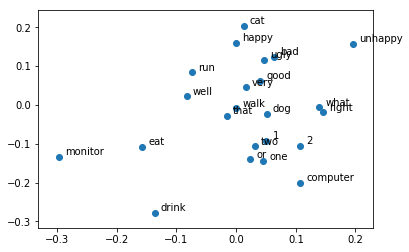

In [18]:
en_first_2d = en_wv.vectors[:,:2]
print(en_first_2d.shape)
plot_words(en_wv, en_words, en_first_2d)

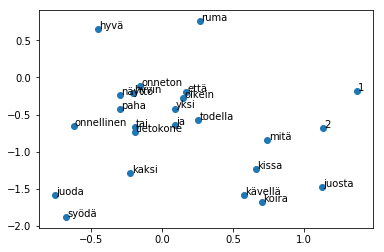

In [19]:
fi_first_2d = fi_wv.vectors[:,:2]
plot_words(fi_wv, fi_words, fi_first_2d)

... but this doesn't make much sense: 99% of the information is just discarded, and there isn't anything special about the first two dimensions.

## Principal component analysis

* General statistical analysis method, standard tool for data analysis in many fields
* Fast and (comparatively) easy to understand: identify axes of highest variance and drop the rest
* Convex objective: the result is always the same

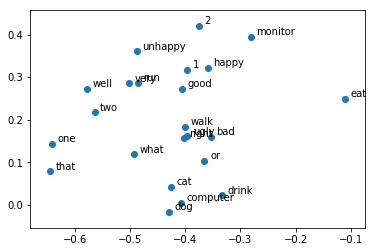

In [20]:
import sklearn.decomposition


pca2 = sklearn.decomposition.PCA(2)

en_vectors_pca2 = pca2.fit_transform(en_wv.vectors)
plot_words(en_wv, en_words, en_vectors_pca2)

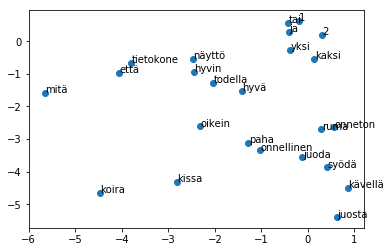

In [21]:
fi_vectors_pca2 = pca2.fit_transform(fi_wv.vectors)
plot_words(fi_wv, fi_words, fi_vectors_pca2)

This is a reasonable visualization, but it's still hard to make sense of the structure.

## t-SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) ([van der Maaten and Hinton, 2008](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf))

* Designed specifically for visualization (reduction to 2D/3D)
* Non-convex: re-running can product different results
* Preserves local relationships (neighbors) but not global structure
* Tends to work great in practice, but can be slow (PCA first can help)

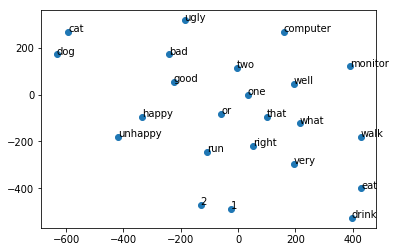

In [22]:
from sklearn.manifold import TSNE


def plot_all_words(words, vectors):
    plt.scatter(vectors[:,0], vectors[:,1])
    for i, word in enumerate(words):
        plt.annotate(s=word, xy=vectors[i], xytext=vectors[i]+(0.01,0.005))


# To reduce computational cost, we'll just work with the word vectors we're plotting
en_word_indices = [en_wv.vocab[w].index for w in en_words]
en_vectors_words = en_wv.vectors[en_word_indices]

# For this small data, needed to tweak perplexity
en_vectors_tsne = TSNE(perplexity=10.0, random_state=1234).fit_transform(en_vectors_words)
plot_all_words(en_words, en_vectors_tsne)

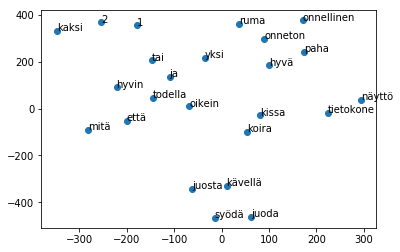

In [23]:
fi_word_indices = [fi_wv.vocab[w].index for w in fi_words]
fi_vectors_words = fi_wv.vectors[fi_word_indices]

fi_vectors_tsne = TSNE(perplexity=10.0, random_state=1234).fit_transform(fi_vectors_words)
plot_all_words(fi_words, fi_vectors_tsne)

(Note: getting a better-looking visualization doesn't mean it's (more) correct!)

---

# Clustering

Unsupervised classification: identify coherent groups (clusters) in data without the help of examples of correct grouping.

* Hard clustering: assign each item to one cluster
* Soft clustering - degree of belonging to a cluster
* Hierarchical clustering - hierarchy of clusters, usually constructed bottom-to-top

(Focus here on hard clustering.)

<img src="figs/sklearn_cluster_comparison.png" width="80%">

<div style="text-align:center; font-size:80%">Illustration of clustering algorithms (figure from <a href="http://scikit-learn.org/stable/modules/clustering.html">scikit-learn documentation</a>)</div>

Depending on the clustering algorithm, we might need:

* A similarity metric on the items being clustered (function or matrix)
* A way to establish cluster centres
* A way to measure between cluster distance
* A way to measure cluster coherence

A notable difference between clustering algorithms is whether they can work with a matrix of pairwise similarities between arbitrary objects, or if they require a vector representation of the data items.

## K-means

* Simple and popular clustering algorithm operating on vectors
* Requires number of clusters (k) to be specified in advance

Iterative algorithm (sketch):

1. Randomly identify k vectors as cluster centers
2. Assign each vector to the nearest center
3. Re-calculate cluster centers
4. Repeat 2-3 until the assignment no longer changes.

---

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" width="40%">

<div style="text-align:center; color:gray; font-size:80%">(Figure from <a href="https://en.wikipedia.org/wiki/K-means_clustering#/media/File:K-means_convergence.gif">Wikimedia Commons</a>)</div>

---

### Example: word vector clustering

Word vectors can be clustered given a measure of their similarity.

**Sidenote**: We would generally prefer cosine similarity but `sklearn` only supports Eucledian distance for K-means. We'll normalize the vectors to unit length, which makes these equivalent for K-means ($\sqrt{\sum (a_i b_i)^2} = \sqrt{2-\sum 2 a_i b_i}$ since $\sum a_i^2 =\sum b_i^2 = 1$)

In [24]:
# init_sims(replace=True) normalizes word vectors
en_wv.init_sims(replace=True)
fi_wv.init_sims(replace=True)

print('{:.2f}'.format(np.dot(en_wv['dog'],en_wv['dog'])))
print('{:.2f}'.format(np.dot(fi_wv['koira'],fi_wv['koira'])))

1.00
1.00


We'll use `MiniBatchKMeans` for clustering. This is a faster approximation of K-means.

In [25]:
import sklearn.cluster

from pprint import pprint as pretty_print


k = sklearn.cluster.MiniBatchKMeans(batch_size=5000, n_clusters=20, random_state=1234)
distances = k.fit_transform(fi_wv.vectors)

print(distances.shape)

pretty_print(list(zip(fi_words, k.labels_[fi_word_indices]))) # Cluster label for each word

(100000, 20)
[('koira', 6),
 ('kissa', 6),
 ('tietokone', 5),
 ('näyttö', 5),
 ('syödä', 19),
 ('juoda', 6),
 ('kävellä', 6),
 ('juosta', 6),
 ('yksi', 3),
 ('kaksi', 7),
 ('1', 7),
 ('2', 7),
 ('hyvä', 3),
 ('paha', 3),
 ('ruma', 3),
 ('onnellinen', 3),
 ('onneton', 3),
 ('ja', 12),
 ('tai', 2),
 ('mitä', 12),
 ('että', 12),
 ('oikein', 12),
 ('todella', 6),
 ('hyvin', 12)]


That's a bit hard to interpret, so let's see that with the words grouped into clusters:

In [26]:
from collections import defaultdict
from pandas import DataFrame


def group_by_label(words, labels):
    grouped = defaultdict(list)
    for word, label in zip(words, labels):
            grouped[label].append(word)
    return grouped


def show_grouped(grouped):
    return DataFrame(list(sorted(grouped.items())), columns=['label', 'words']).style.hide_index()


grouped = group_by_label(fi_words, k.labels_[fi_word_indices])
show_grouped(grouped)

label,words
2,['tai']
3,"['yksi', 'hyvä', 'paha', 'ruma', 'onnellinen', 'onneton']"
5,"['tietokone', 'näyttö']"
6,"['koira', 'kissa', 'juoda', 'kävellä', 'juosta', 'todella']"
7,"['kaksi', '1', '2']"
12,"['ja', 'mitä', 'että', 'oikein', 'hyvin']"
19,['syödä']


And the same for English:

In [27]:
k = sklearn.cluster.MiniBatchKMeans(batch_size=5000, n_clusters=20, random_state=1234)
distances = k.fit_transform(en_wv.vectors)


grouped = group_by_label(en_words, k.labels_[en_word_indices])
show_grouped(grouped)

label,words
0,"['computer', '1', '2']"
4,['dog']
6,"['cat', 'eat', 'drink']"
7,"['monitor', 'happy', 'or', 'what', 'that', 'right']"
9,"['very', 'well']"
12,"['walk', 'run', 'one', 'two']"
15,"['good', 'bad', 'ugly', 'unhappy']"


Some unexpected groupings there, but at least part of the expected structure is correct.

The clusters above are built on 100K words, how about we try just with our example words? This makes it easier to pick an appropriate value of k:

In [28]:
k = sklearn.cluster.MiniBatchKMeans(batch_size=5000, n_clusters=7, random_state=1234)
distances = k.fit_transform(fi_wv.vectors[fi_word_indices])
    
grouped = group_by_label(fi_words, k.labels_)
show_grouped(grouped)

label,words
0,"['syödä', 'juoda', 'kävellä', 'juosta']"
1,"['koira', 'kissa', 'oikein', 'todella', 'hyvin']"
2,"['kaksi', '1', '2']"
3,['onnellinen']
4,"['ja', 'tai', 'mitä', 'että']"
5,"['tietokone', 'näyttö']"
6,"['yksi', 'hyvä', 'paha', 'ruma', 'onneton']"


In [29]:
k = sklearn.cluster.MiniBatchKMeans(batch_size=5000, n_clusters=7, random_state=1234)
distances=k.fit_transform(en_wv.vectors[en_word_indices])

grouped = group_by_label(en_words, k.labels_)
show_grouped(grouped)

label,words
0,"['ugly', 'happy', 'unhappy', 'very', 'well']"
1,"['dog', 'cat', 'computer', 'monitor', 'or']"
2,"['one', 'two', '1', '2']"
3,"['walk', 'run']"
4,"['eat', 'drink']"
5,"['what', 'that', 'right']"
6,"['good', 'bad']"


Not too bad given that the methods are told nothing about the words.

---